## Introduction
You've probably already encountered the terms **polynomial** and **polynomial function**. This chapter is completely on polynomials, i.e. we will define a class to define polynomials. The following is an example of a polynomial with the degree 4:

$ p(x) = x^4 - 4 \cdot x^2 + 3 \cdot x $

You will find out that there are lots of similarities to integers. We will define various arithmetic operations for polynomials in our class, like addition, subtraction, multiplication and division. Our polynomial class will also provide means to calculate the derivation and the integral of polynomials. We will not miss out on plotting polynomials.

There is a lot of beauty in polynomials and, above all, in how they can be implemented as a Python class.

## Short Mathematical Introduction
We will only deal with polynomial in a single indeterminate (also called variable) x. A general form of a polynomial in a single indeterminate looks like this:

$ a_n \cdot x^n + a_{n-1} \cdot x^{n-1} + \ldots + a_2 \cdot x^2 + a_1 \cdot x + a_0 $

where $ a_0, a_1, ... a_n $ are the constants (non-negative integers) and $ x $ is the indeterminate or variable. The term "indeterminate" means that $ x $ represents no particular value, but any value may be substituted for it.

This expression is usually written with the summation operator:

$ \sum_{k=0}^{n} a_k \cdot x^k = a_n \cdot x^n + a_{n-1} \cdot x^{n-1} + \ldots + a_2 \cdot x^2 + a_1 \cdot x + a_0 $

A polynomial function is a function that can be defined by evaluating a polynomial. A function f of one argument can be defined as:

$ f(x) = \sum_{k=0}^{n} a_k \cdot x^k $

## Polynomial Functions with Python
It's easy to implement polynomial functions in Python. As an example we define the polynomial function given in the introduction of this chapter, i.e. $ p(x) = x^4 - 4 \cdot x^2 + 3 \cdot x $.

The Python code for this polynomial function looks like this:

In [1]:
def p(x):
    return x**4 - 4*x**2 + 3*x

In [4]:
# we can call the function like any other function
for x in [-1, 0, 2, 3.4]:
    print("x =", x, ";", "p(x) =", p(x))

x = -1 ; p(x) = -6
x = 0 ; p(x) = 0
x = 2 ; p(x) = 6
x = 3.4 ; p(x) = 97.59359999999998


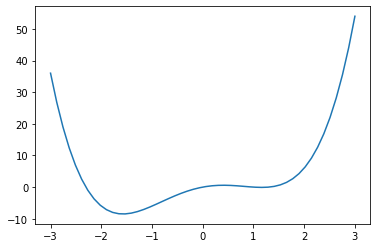

In [5]:
# now let's plot it
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 50, endpoint=True)
F = p(X)
plt.plot(X,F)

plt.show()

## Polynomial Class
We will now define a class for polynomial functions. A polynomial is uniquely determined by its coefficients. This means, an instance of our polynomial class needs a list or tuple to define the coefficients.

In [6]:
class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
        """
        return "Polynomial" + str(tuple(self.coefficients))

In [7]:
# We can then instantiate the polynomial of our previous example polynomial function like this
p = Polynomial(1, 0, -4, 3, 0)
print(p)

p2 = eval(repr(p))
print(p2)

Polynomial(1, 0, -4, 3, 0)
Polynomial(1, 0, -4, 3, 0)


Having defined the canonical string representation of a Polynomial with the ```repr``` function, we also want to define an output which could be used to create a version which is more friendly for people. We write a LaTex represention which can be used to print the function in a beautiful way:

In [8]:
class Polynomial:
    
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
        """
        return "Polynomial" + str(tuple(self.coefficients))

    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

In [9]:
polys = [Polynomial(1, 0, -4, 3, 0),
         Polynomial(2, 0),
         Polynomial(4, 1, -1),
         Polynomial(3, 0, -5, 2, 7),
         Polynomial(-42)]

# output suitable for usage in LaTeX:
for count, poly in enumerate(polys):
    print(f"$p_{count} = {str(poly)}$")

$p_0 = x^4-4x^2+3x$
$p_1 = 2x$
$p_2 = 4x^2+x-1$
$p_3 = 3x^4-5x^2+2x+7$
$p_4 = -42$


If we use this in LaTeX it will look like this:

$p_0 = x^4-4x^2+3x$

$p_1 = 2x$

$p_2 = 4x^2+x-1$

$p_3 = 3x^4-5x^2+2x+7$

$p_4 = -42$

So far, we have defined **polynomials**, but what we actually need are **polynomial functions**. For this purpose, we turn instances of the Polynomial class into **callables** by defining the **call** method.

In [10]:
class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
    
    # The __repr__ and __str__ method can be included here,
    # but is not necessary for the immediately following code
            
    def __call__(self, x):    
        res = 0
        for index, coeff in enumerate(self.coefficients[::-1]):
            res += coeff * x** index
        return res 

It is possible now to call an instance of our class like a function. We call it with an argument and the instance - which is a callable - behaves like a polynomial function:

In [12]:
p = Polynomial(3, 0, -5, 2, 1)
print(p)

for x in range(-3, 3):
    print("x =", x, ";", "p(x) =", p(x))

x = -3 ; p(x) = 193
x = -2 ; p(x) = 25
x = -1 ; p(x) = -3
x = 0 ; p(x) = 1
x = 1 ; p(x) = 1
x = 2 ; p(x) = 33


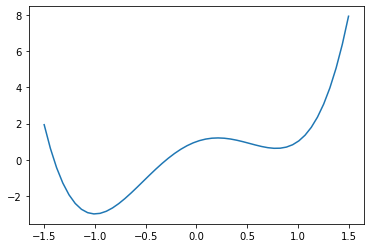

In [13]:
# Just for fun, let's plot the previously defined function
import matplotlib.pyplot as plt

X = np.linspace(-1.5, 1.5, 50, endpoint=True)
F = p(X)
plt.plot(X, F)

plt.show()

Before we further refine our class, let us use a numerically more efficient variant for the calculation of polynomials. We will use this algorithm in our ```__call__``` method.

Every polynomial

$ f(x) = \sum_{k=0}^{n} a_k \cdot x^k $

can also be written in the form

$ f(x) = (a_n x + x_{n-1})x + \cdot + a_1)x + a_0 $

To emperically see that they are equivalent, we rewrite our class definition, but call it ```Polynomial2``` so that we can use both versions:

In [14]:
class Polynomial2:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
         
    # The __repr__ and __str__ method can be included here,
    # but is not necessary for the immediately following code
    
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 

In [15]:
# We will test both classes by comparing the results
p1 = Polynomial(-4, 3, 0)
p2 = Polynomial2(-4, 3, 0)
res = all((p1(x)==p2(x) for x in range(-10, 10)))
print(res)

True


It is possible to define addition and subtractions for polynomials. All we have to do is to add or subtract the coefficients with the same exponents from both polynomials.

If we have polynomial functions $ f(x) = \sum_{k=0}^{n} a_k \cdot x^k $ and $ g(x) = \sum_{k=0}^{n} b_k \cdot x^k $, the addition is defined as

$ (f+g)(x) = \sum_{k=0}^{n} (a_k + b_k) \cdot x^k $

and correspondingly the subtraction is defined as

$ (f-g)(x) = \sum_{k=0}^{n} (a_k - b_k) \cdot x^k $

Before we can add the methods ```__add__``` and ```__sub__```, which are necessary for addition and subtraction, we add a generator zip_longest(). It works similarly to zip for two parameters, but it does not stop if one of the iterators is exhausted but uses "fillvalue" instead.

In [16]:
def zip_longest(iter1, iter2, fillvalue=None):
    
    for i in range(max(len(iter1), len(iter2))):
        if i >= len(iter1):
            yield (fillvalue, iter2[i])
        elif i >= len(iter2):
            yield (iter1[i], fillvalue)
        else:
            yield (iter1[i], iter2[i])
        i += 1

p1 = (2,)
p2 = (-1, 4, 5)
for x in zip_longest(p1, p2, fillvalue=0):
    print(x)

(2, -1)
(0, 4)
(0, 5)


We will add this generator to our class as a static method. We are now capable of adding the ```__add__``` and ```__sub__``` methods as well. We will need the generator ```zip_longest``` from ```itertools```. ```zip_longest``` takes and arbitrary number of iterables and a keyword parameter ```fillvalue```. It creates an iterator that aggregates elements from each of the iterables. If the iterables are of uneven length, missing values are filled-in with fillvalue. Iteration continues until the longest iterable is exhausted.

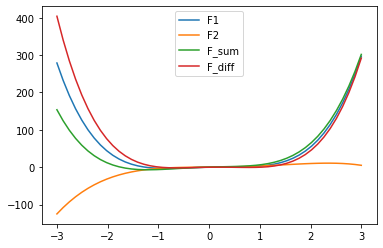

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest

class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        return "Polynomial" + str(self.coefficients)
            
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 
    
    def degree(self):
        return len(self.coefficients) - 1 if len(self.coefficients) > 0 else 0  
            
    def __add__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [sum(t) for t in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    
    def __sub__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        
        res = [t1-t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    

            
p1 = Polynomial(4, 0, -4, 3, 0)
p2 = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)

p_sum = p1 + p2
p_diff = p1 - p2

X = np.linspace(-3, 3, 50, endpoint=True)
F1 = p1(X)
F2 = p2(X)
F_sum = p_sum(X)
F_diff = p_diff(X)
plt.plot(X, F1, label="F1")
plt.plot(X, F2, label="F2")
plt.plot(X, F_sum, label="F_sum")
plt.plot(X, F_diff, label="F_diff")

plt.legend()
plt.show()

It is incredibly easy to add differentiation to our class. Mathematically, it is defined as

$ f'(x) = \sum_{k=0}^{n} k \cdot a_k \cdot x^{k-1} $

if

$ f(x) = \sum_{k=0}^{n} a_k \cdot x^k $

This can be easily implemented in our method 'derivative':

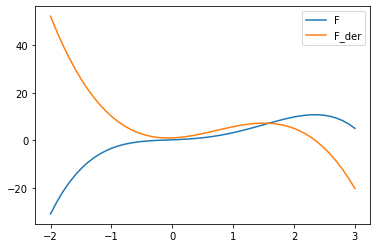

In [60]:
import numpy as np
import matplotlib.pyplot as plt


class Polynomial:
 

    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list

        
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        return "Polynomial" + str(self.coefficients)

    
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 

    
    def degree(self):
        return len(self.coefficients) - 1 if len(self.coefficients) > 0 else 0 

    
    def __add__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [t1+t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)][::-1]
        return Polynomial(*res)

    
    def __sub__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [t1-t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)][::-1]
        return Polynomial(*res)
 

    def derivative(self):
        derived_coeffs = []
        exponent = len(self.coefficients) - 1
        for i in range(len(self.coefficients)-1):
            derived_coeffs.append(self.coefficients[i] * exponent)
            exponent -= 1
        return Polynomial(*derived_coeffs)

    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

            
p = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)

p_der = p.derivative()

X = np.linspace(-2, 3, 50, endpoint=True)

F = p(X)
F_derivative = p_der(X)
plt.plot(X, F, label="F")
plt.plot(X, F_derivative, label="F_der")

plt.legend()
plt.show()

In [62]:
# Playing around a little bit
p = Polynomial(1, 2, -3, 4, -55)

p2 = Polynomial(1, 2, 3)

p_der = p.derivative()

print("f1(x) =", p)
print("f1'(x) =", p_der)
print("f2(x) =", p2)

p3 = p + p2

print("f1(x) + f2(x) =", p3)

f1(x) = x^4+2x^3-3x^2+4x-55
f1'(x) = 4x^3+6x^2-6x+4
f2(x) = x^2+2x+3
f1(x) + f2(x) = x^4+2x^3-2x^2+6x-52
